# 2019 Waterhackweek participant selection

###  C. Bandaragoda, Jan 16, 2019
#### The selection method used in this work is supported by a selection and review team: Nicoleta Cristea, Lilian McGill, and Veronica Smith who is providing Independent Education Evaluation (www.data2insight.com)

#### This notebook includes code for Geohackweek 2018 by  A. Arendt and L. Setiawan, May 2, 2018, 

### The [Entrofy](https://github.com/dhuppenkothen/entrofy) library used is designed by Daniela Huppenkothen.  This code is also available at [Entofy with installation updates 2019](https://github.com/ChristinaB/entrofy) branch.

This work is supported by NSF Cybertraining Program Award [1829585](https://nsf.gov/awardsearch/showAward?AWD_ID=1829585&HistoricalAwards=false) in support of using cyberinfrastructure to address challenges in research training, education and workforce development. Collaborative Research Project Title: Data Streams, Model Workflows, and Educational Pipelines for Hydrologic Sciences.

## 1.0 Import libraries and data

### 1.1 Import libraries.  Note: this version of entrofy code runs in Python 2.7

In [82]:
%matplotlib inline
import os
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import entrofy
import entrofy.mappers
import entrofy.core

import six
import itertools

seed = 20190112

### 1.2 Read in the anonymized data table

In [83]:
df = pd.DataFrame.from_csv('waterhack_applicants_2019-anonymous.csv')
df.reset_index(drop=True, inplace=True)

### 1.3 Clean data:  rename and rearrange the columns

In [84]:
pc_col = ['first_name', 
          'last_name', 
          'email', 
          'birth_date', 
          'academic_institution', 
          'city', 
          'state', 
          'country', 
          'position', 
          'grad_program', 
          # Never heard of this language
          'never_python', 
          'never_r', 
          'never_julia', 
          'never_sql', 
          'never_java', 
          'never_js', 
          'never_c_cp', 
          'never_stata_sas', 
          'never_shell', 
          'never_other',
          # Heard of this language, but never used it
          'heard_python', 
          'heard_r', 
          'heard_julia', 
          'heard_sql', 
          'heard_java', 
          'heard_js', 
          'heard_c_cp', 
          'heard_stata_sas', 
          'heard_shell', 
          'heard_other',
          # Print "Hello world!" to console
          'print_python', 
          'print_r', 
          'print_julia', 
          'print_sql', 
          'print_java', 
          'print_js', 
          'print_c_cp', 
          'print_stata_sas', 
          'print_shell', 
          'print_other',
          # Write any function
          'func_python', 
          'func_r', 
          'func_julia', 
          'func_sql', 
          'func_java', 
          'func_js', 
          'func_c_cp', 
          'func_stata_sas', 
          'func_shell', 
          'func_other',
          # Read data from tab-delimited file
          'read_tsv_python', 
          'read_tsv_r', 
          'read_tsv_julia', 
          'read_tsv_sql', 
          'read_tsv_java', 
          'read_tsv_js', 
          'read_tsv_c_cp', 
          'read_tsv_stata_sas', 
          'read_tsv_shell', 
          'read_tsv_other',
          # Import a library or package
          'import_python', 
          'import_r', 
          'import_julia', 
          'import_sql', 
          'import_java', 
          'import_js', 
          'import_c_cp', 
          'import_stata_sas', 
          'import_shell', 
          'import_other',
          # Produce a plot or graph
          'plot_python', 
          'plot_r', 
          'plot_julia', 
          'plot_sql', 
          'plot_java', 
          'plot_js', 
          'plot_c_cp', 
          'plot_stata_sas', 
          'plot_shell', 
          'plot_other',
          # Scrape a web page
          'webscrape_python', 
          'webscrape_r', 
          'webscrape_julia', 
          'webscrape_sql', 
          'webscrape_java', 
          'webscrape_js', 
          'webscrape_c_cp', 
          'webscrape_stata_sas', 
          'webscrape_shell', 
          'webscrape_other',
          # Train statistical or machine learning model
          'ml_python', 
          'ml_r', 
          'ml_julia', 
          'ml_sql', 
          'ml_java', 
          'ml_js', 
          'ml_c_cp', 
          'ml_stata_sas', 
          'ml_shell', 
          'ml_other',
          # Work with > 1TB of data
          'bigdata_python', 
          'bigdata_r', 
          'bigdata_julia', 
          'bigdata_sql', 
          'bigdata_java', 
          'bigdata_js', 
          'bigdata_c_cp', 
          'bigdata_stata_sas', 
          'bigdata_shell', 
          'bigdata_other',
          # Develop a complex application or module
          'module_python', 
          'module_r', 
          'module_julia', 
          'module_sql', 
          'module_java', 
          'module_js', 
          'module_c_cp', 
          'module_stata_sas', 
          'module_shell', 
          'module_other',
          # Documented and released production code intended for use by ...
          'release_python', 
          'release_r', 
          'release_julia', 
          'release_sql', 
          'release_java', 
          'release_js', 
          'release_c_cp', 
          'release_stata_sas', 
          'release_shell', 
          'release_other',
          # Contributed to community-supported open-source project
          'contributor_python', 
          'contributor_r', 
          'contributor_julia', 
          'contributor_sql', 
          'contributor_java', 
          'contributor_js', 
          'contributor_c_cp', 
          'contributor_stata_sas', 
          'contributor_shell', 
          'contributor_other', 
          'other_language', 
          'github', 
          'data_analyzed', 
          'why_participate', 
          'source', 
          'cv_link', 
          'travel_grant', 
          'gender_minor', 
          'race_minor', 
          'sig_first', 
          'sig_last', 
          'date',
          # Columns added for science domain diversity: Waterhackweek 2019
           'UniqueID',
           'PreselectIDcheck',
           'PythonID',
           'met_climate',
           'snow_ice',
           'alpine_forest',
           'riv_streams',
           'lake_wetlands',
           'geo_sediment',
           'quality_waste',
           'extreme_event_disaster',
           'urban',
           'datasci_model_software',
           'fish_aquatic',
           'other',
          # Columns added for demographic diversity: Waterhackweek 2019
             'gender',
              'lgbtq',
              'race_ethnic',
              'language',
            'motivation']


In [85]:
df.columns = pc_col

# Copy of gender column added for coding nonbinary_transgender target in Section 2.6
df['nonbin_trans']=df['gender']

In [86]:
df2 = df.copy()

In [87]:
df2.loc[:, 'never_heard'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'never' in k]), axis=1)
df2.loc[:, 'have_heard_never_use'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'heard' in k]), axis=1)
df2.loc[:, 'print_hello_world'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'print' in k]), axis=1)
df2.loc[:, 'write_func'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'func' in k]), axis=1)
df2.loc[:, 'read_tsv'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'read_tsv' in k]), axis=1)
df2.loc[:, 'import_lib'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'import' in k]), axis=1)
df2.loc[:, 'webscraping'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'webscrape' in k]), axis=1)
df2.loc[:, 'plotting'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'plot' in k]), axis=1)
df2.loc[:, 'machine_learning'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'ml' in k]), axis=1)
df2.loc[:, 'bigdata'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'bigdata' in k]), axis=1)
df2.loc[:, 'dev_module'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'module' in k]), axis=1)
df2.loc[:, 'release'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'release' in k]), axis=1)
df2.loc[:, 'oss_contributor'] = df.apply(lambda x: '; '.join([v for k, v in x.dropna().to_dict().items() if 'contributor' in k]), axis=1)

In [88]:
df2 = df2.drop([# Never heard of this language
          'never_python', 
          'never_r', 
          'never_julia', 
          'never_sql', 
          'never_java', 
          'never_js', 
          'never_c_cp', 
          'never_stata_sas', 
          'never_shell', 
          'never_other',
          # Heard of this language, but never used it
          'heard_python', 
          'heard_r', 
          'heard_julia', 
          'heard_sql', 
          'heard_java', 
          'heard_js', 
          'heard_c_cp', 
          'heard_stata_sas', 
          'heard_shell', 
          'heard_other',
          # Print "Hello world!" to console
          'print_python', 
          'print_r', 
          'print_julia', 
          'print_sql', 
          'print_java', 
          'print_js', 
          'print_c_cp', 
          'print_stata_sas', 
          'print_shell', 
          'print_other',
          # Write any function
          'func_python', 
          'func_r', 
          'func_julia', 
          'func_sql', 
          'func_java', 
          'func_js', 
          'func_c_cp', 
          'func_stata_sas', 
          'func_shell', 
          'func_other',
          # Read data from tab-delimited file
          'read_tsv_python', 
          'read_tsv_r', 
          'read_tsv_julia', 
          'read_tsv_sql', 
          'read_tsv_java', 
          'read_tsv_js', 
          'read_tsv_c_cp', 
          'read_tsv_stata_sas', 
          'read_tsv_shell', 
          'read_tsv_other',
          # Import a library or package
          'import_python', 
          'import_r', 
          'import_julia', 
          'import_sql', 
          'import_java', 
          'import_js', 
          'import_c_cp', 
          'import_stata_sas', 
          'import_shell', 
          'import_other',
          # Produce a plot or graph
          'plot_python', 
          'plot_r', 
          'plot_julia', 
          'plot_sql', 
          'plot_java', 
          'plot_js', 
          'plot_c_cp', 
          'plot_stata_sas', 
          'plot_shell', 
          'plot_other',
          # Scrape a web page
          'webscrape_python', 
          'webscrape_r', 
          'webscrape_julia', 
          'webscrape_sql', 
          'webscrape_java', 
          'webscrape_js', 
          'webscrape_c_cp', 
          'webscrape_stata_sas', 
          'webscrape_shell', 
          'webscrape_other',
          # Train statistical or machine learning model
          'ml_python', 
          'ml_r', 
          'ml_julia', 
          'ml_sql', 
          'ml_java', 
          'ml_js', 
          'ml_c_cp', 
          'ml_stata_sas', 
          'ml_shell', 
          'ml_other',
          # Work with > 1TB of data
          'bigdata_python', 
          'bigdata_r', 
          'bigdata_julia', 
          'bigdata_sql', 
          'bigdata_java', 
          'bigdata_js', 
          'bigdata_c_cp', 
          'bigdata_stata_sas', 
          'bigdata_shell', 
          'bigdata_other',
          # Develop a complex application or module
          'module_python', 
          'module_r', 
          'module_julia', 
          'module_sql', 
          'module_java', 
          'module_js', 
          'module_c_cp', 
          'module_stata_sas', 
          'module_shell', 
          'module_other',
          # Documented and released production code intended for use by ...
          'release_python', 
          'release_r', 
          'release_julia', 
          'release_sql', 
          'release_java', 
          'release_js', 
          'release_c_cp', 
          'release_stata_sas', 
          'release_shell', 
          'release_other',
          # Contributed to community-supported open-source project
          'contributor_python', 
          'contributor_r', 
          'contributor_julia', 
          'contributor_sql', 
          'contributor_java', 
          'contributor_js', 
          'contributor_c_cp', 
          'contributor_stata_sas', 
          'contributor_shell', 
          'contributor_other'], axis='columns')

In [89]:
df3 = df.copy()

## 2.0 Format data for entrofy targets

### 2.1  Assign a numeric score to the different levels of Python coding skill

In [90]:
exp_score = {
    'never': 0,
    'heard': 1,
    'print': 2,
    'func': 3,
    'read_tsv': 4,
    'import': 5,
    'plot': 6,
    'webscrape': 7,
    'ml': 8,
    'bigdata': 9,
    'module': 10,
    'release': 11,
    'contributor': 12
}

In [91]:
languages = {
    'python': 'Python',
    'r': 'R',
    'julia': 'Julia',
    'sql': 'SQL',
    'java': 'Java',
    'js': 'JavaScript',
    'c_cp': 'C/C++',
    'stata_sas': 'Stata/SAS',
    'shell': 'Shell scripting, e.g, bash',
    'other': 'Other'
}

### combine datasets used into a smaller number of categories

In [92]:
def score(lang, person):
    score = []
    for c in person.keys():
        if lang in c:
            if person[c] == languages[lang]:
                score.append(exp_score[c.replace('_{}'.format(lang), '')])
    return sum(score)

In [93]:
for k, v in languages.items():
    df3.loc[:, k] = df3.apply(lambda person: score(k, person), axis=1)

In [94]:
df3 = df3.drop([# Never heard of this language
          'never_python', 
          'never_r', 
          'never_julia', 
          'never_sql', 
          'never_java', 
          'never_js', 
          'never_c_cp', 
          'never_stata_sas', 
          'never_shell', 
          'never_other',
          # Heard of this language, but never used it
          'heard_python', 
          'heard_r', 
          'heard_julia', 
          'heard_sql', 
          'heard_java', 
          'heard_js', 
          'heard_c_cp', 
          'heard_stata_sas', 
          'heard_shell', 
          'heard_other',
          # Print "Hello world!" to console
          'print_python', 
          'print_r', 
          'print_julia', 
          'print_sql', 
          'print_java', 
          'print_js', 
          'print_c_cp', 
          'print_stata_sas', 
          'print_shell', 
          'print_other',
          # Write any function
          'func_python', 
          'func_r', 
          'func_julia', 
          'func_sql', 
          'func_java', 
          'func_js', 
          'func_c_cp', 
          'func_stata_sas', 
          'func_shell', 
          'func_other',
          # Read data from tab-delimited file
          'read_tsv_python', 
          'read_tsv_r', 
          'read_tsv_julia', 
          'read_tsv_sql', 
          'read_tsv_java', 
          'read_tsv_js', 
          'read_tsv_c_cp', 
          'read_tsv_stata_sas', 
          'read_tsv_shell', 
          'read_tsv_other',
          # Import a library or package
          'import_python', 
          'import_r', 
          'import_julia', 
          'import_sql', 
          'import_java', 
          'import_js', 
          'import_c_cp', 
          'import_stata_sas', 
          'import_shell', 
          'import_other',
          # Produce a plot or graph
          'plot_python', 
          'plot_r', 
          'plot_julia', 
          'plot_sql', 
          'plot_java', 
          'plot_js', 
          'plot_c_cp', 
          'plot_stata_sas', 
          'plot_shell', 
          'plot_other',
          # Scrape a web page
          'webscrape_python', 
          'webscrape_r', 
          'webscrape_julia', 
          'webscrape_sql', 
          'webscrape_java', 
          'webscrape_js', 
          'webscrape_c_cp', 
          'webscrape_stata_sas', 
          'webscrape_shell', 
          'webscrape_other',
          # Train statistical or machine learning model
          'ml_python', 
          'ml_r', 
          'ml_julia', 
          'ml_sql', 
          'ml_java', 
          'ml_js', 
          'ml_c_cp', 
          'ml_stata_sas', 
          'ml_shell', 
          'ml_other',
          # Work with > 1TB of data
          'bigdata_python', 
          'bigdata_r', 
          'bigdata_julia', 
          'bigdata_sql', 
          'bigdata_java', 
          'bigdata_js', 
          'bigdata_c_cp', 
          'bigdata_stata_sas', 
          'bigdata_shell', 
          'bigdata_other',
          # Develop a complex application or module
          'module_python', 
          'module_r', 
          'module_julia', 
          'module_sql', 
          'module_java', 
          'module_js', 
          'module_c_cp', 
          'module_stata_sas', 
          'module_shell', 
          'module_other',
          # Documented and released production code intended for use by ...
          'release_python', 
          'release_r', 
          'release_julia', 
          'release_sql', 
          'release_java', 
          'release_js', 
          'release_c_cp', 
          'release_stata_sas', 
          'release_shell', 
          'release_other',
          # Contributed to community-supported open-source project
          'contributor_python', 
          'contributor_r', 
          'contributor_julia', 
          'contributor_sql', 
          'contributor_java', 
          'contributor_js', 
          'contributor_c_cp', 
          'contributor_stata_sas', 
          'contributor_shell', 
          'contributor_other'], axis='columns')

### 2.2 Combine career stage into a smaller number of categories

In [149]:
df3.replace(to_replace = {'position':{'Graduate/postgraduate student':'grad_postgrad',
                                      'PhD':'grad_postgrad',
                                      #'Postdoc':'Postdoc',
                                      'Undergraduate/college student':'undergrad',
                                      'Research Staff / Industry / PhD Applicant':'Industry',
                                      'Industry, University staff':'Industry',
                                      'GIS Officer':'Industry',
                                      'Non-Profit Environment and Development Research Institution in Africa':'Industry',
                                      'NGO':'Industry',
                                      'External Evaluator':'Industry',
                                      'Self-employed consultant':'Industry'
                                      }}, inplace=True)
df3['position'].unique()

array(['Industry', 'grad_postgrad', 'Government', 'Tribal Government',
       'Research Staff', 'Faculty', 'Postdoc', 'undergrad'], dtype=object)

### 2.3  Additional cleaning to handle variations in Country listing, and create a new category to partition out US versus non-US applicants

In [150]:
df3.replace(to_replace = {'country':{'United States':'USA',
                                         'U.S.A':'USA',
                                         'U.S.':'USA',
                                         'King':'USA',
                                         'US':'USA',
                                         'United States':'USA',
                                         'Unites States':'USA',
                                         'United States of America':'USA',
                                         'United States of Ameria':'USA',
                                         '98105':'USA',
                                         '98112':'USA',
                                         '95603':'USA',
                                         'M\xc3\xa9xico':'Mexico'
                                          }}, inplace = True)
df3['country'].unique()

array(['USA', 'Ethiopia', 'Thailand', 'Nigeria', 'CHINA', 'Canada',
       'Nepal', 'Uganda', 'Czech Republic', 'UK', 'INDIA', 'Spain',
       'Austria', 'China'], dtype=object)

In [151]:
df3['USA'] = df3.apply(lambda row: 1 if row['country'] == 'USA' else 0, axis=1)

### 2.4  Clean up academic institution, and create a new category to partition out UW versus non-UW applicants

In [152]:
df3.replace(to_replace = {'academic_institution':{'UW':'University of Washington',
                                                 'Applied Physics Laboratory at University of Washington':'University of Washington',
                                                 'University Of Washington':'University of Washington',
                                                 'University of Washington (will be at Salesforce (Data Scientist)  in March 2019)':'University of Washington',
                                                 'University of Washington ':'University of Washington',
                                                  'University of Washington, Seattle':'University of Washington',
                                                  'University of Washington, Applied Physics Lab':'University of Washington',
                                                  'The University of Washington':'University of Washington',
                                                  'Universitat Polit\xe8cnica de Catalunya (UPC), Barcelona':'Universitat Politecnica de Catalunya (UPC), Barcelona',
                                                 'UW School of Medicine':'University of Washington'}}, inplace = True)

In [153]:
df3['atUW'] = df3.apply(lambda row: 1 if row['academic_institution'] == 'University of Washington' else 0, axis=1)

In [154]:
df3['academic_institution'].unique()

array(['Big Water Consulting', 'Brigham Young University', 'CCNY',
       'City of Seattle', 'City University of New York',
       'Columbia River Inter-Tribal Fish Commission', 'CUAHSI',
       'Department of Environmental Sciences, University of Colorado-Boulder',
       'ECWC',
       'Faculty of Resources and Environement, Mahasarakham University, Thailand',
       'Florida International University',
       'Global Network for Environment and Economic Development Research',
       'GUANGXI UNIVERSITY', 'Inlet Laboratories',
       'International Centre for Integrated Mountain Development (ICIMOD)',
       'Jupiter Intelligence', 'Loyola Marymount University',
       'Makerere University', 'Masaryk University',
       'northumbria university', 'Portland State University',
       'Rutgers University', 'Southern Nevada Water Authority', 'TERI',
       'The University of Alabama', 'University of Washington',
       'UC Berekeley',
       'Universitat Politecnica de Catalunya (UPC), Bar

### 2.5 Clean science data expertise into bins

In [101]:
df3['met_climate']=df3['met_climate'].fillna(0)
df3['snow_ice']=df3['snow_ice'].fillna(0)
df3['alpine_forest']=df3['alpine_forest'].fillna(0)
df3['riv_streams']=df3['riv_streams'].fillna(0)

df3['lake_wetlands']=df3['lake_wetlands'].fillna(0)
df3['geo_sediment']=df3['geo_sediment'].fillna(0)
df3['quality_waste']=df3['quality_waste'].fillna(0)
df3['extreme_event_disaster']=df3['extreme_event_disaster'].fillna(0)

df3['urban']=df3['urban'].fillna(0)
df3['datasci_model_software']=df3['datasci_model_software'].fillna(0)
df3['fish_aquatic']=df3['fish_aquatic'].fillna(0)
df3['other']=df3['other'].fillna(0)


### 2.6 Clean demographic data into bins

In [102]:
df3.replace(to_replace = {'academic_institution':{'UW':'University of Washington',
                                                 'Applied Physics Laboratory at University of Washington':'University of Washington',
                                                 'University Of Washington':'University of Washington',
                                                 'University of Washington (will be at Salesforce (Data Scientist)  in March 2019)':'University of Washington',
                                                 'University of Washington ':'University of Washington',
                                                  'University of Washington, Seattle':'University of Washington',
                                                  'University of Washington, Applied Physics Lab':'University of Washington',
                                                  'The University of Washington':'University of Washington',
                                                  'Universitat Polit\xe8cnica de Catalunya (UPC), Barcelona':'Universitat Politecnica de Catalunya (UPC), Barcelona',
                                                 'UW School of Medicine':'University of Washington'}}, inplace = True)

In [103]:
df3['gender']=df3['gender'].fillna(0)
df3.replace(to_replace = {'gender':{'Non-binary/third gender':'Neither or Prefer not to say',
                                   0:'Neither or Prefer not to say'
                                  }}, inplace = True)

df3['gender'].unique()



array(['Neither or Prefer not to say', 'Male', 'Female'], dtype=object)

In [104]:
df3['nonbin_trans']=df3['nonbin_trans'].fillna(0)
df3.replace(to_replace = {'nonbin_trans':{'Male':'Binary or Prefer not to say',
                                       'Female':'Binary or Prefer not to say',
                                          0:'Binary or Prefer not to say',
                                  }}, inplace = True)

df3['nonbin_trans'].unique()
#df3['nonbin_trans']

array(['Binary or Prefer not to say', 'Non-binary/third gender'], dtype=object)

In [105]:
df3['lgbtq']=df3['lgbtq'].fillna(0)
df3.replace(to_replace = {'lgbtq':{'No, but I identify as an Ally*':'No or Prefer not to say',
                                   0:'No or Prefer not to say',
                                   'Prefer not to say':'No or Prefer not to say',
                                   'No':'No or Prefer not to say',
                                  }}, inplace = True)

df3['lgbtq'].unique()

array(['No or Prefer not to say', 'Yes'], dtype=object)

In [106]:
df3['race_ethnic']=df3['race_ethnic'].fillna(0)
df3.replace(to_replace = {'race_ethnic':{'Asian\nWhite, European American, or Caucasian':'People of Color',
                                   0:'No answer or Prefer not to say',
                                   'Hispanic, Latinx, or Spanish':'People of Color',
                                   'African, African American, or Black':'People of Color',
                                  'Asian':'People of Color',
                                   'Hispanic, Latinx, or Spanish\nWhite, European American, or Caucasian':'People of Color',
                                   'African, African American, or Black\nWhite, European American, or Caucasian':'People of Color',
                                   'Indian':'People of Color',
                                         'Middle Eastern or North African':'People of Color',
                                         'biracial':'People of Color',
                                  }}, inplace = True)

df3['race_ethnic'].unique()

array(['No answer or Prefer not to say', 'People of Color',
       'White, European American, or Caucasian'], dtype=object)

In [107]:
df3['language'] = df3.apply(lambda row: 1 if row['language'] == 'English' else 0, axis=1)

df3['language'].unique()

array([0, 1], dtype=int64)

In [155]:
df['motivation'].unique()

array([ 2.75,  4.  ,  1.  ,  2.  ,  3.  ,  2.5 ,  2.25,  0.5 ,  0.75,
        1.5 ,  1.75])

## 3.0 Plot input data

### 3.1 Functions to generate plots

In [108]:
def make_plot_categorical(column_str):
    ax = entrofy.plotting.plot_distribution(df3, column_str,
                                        xtype="categorical",
                                        cmap="YlGnBu", ax=None)
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation='vertical')

def make_plot_continuous(column_str):
    ax = entrofy.plotting.plot_distribution(df3, column_str,
                                        xtype="continuous",
                                        cmap="YlGnBu", ax=None)

### Academic Institution?

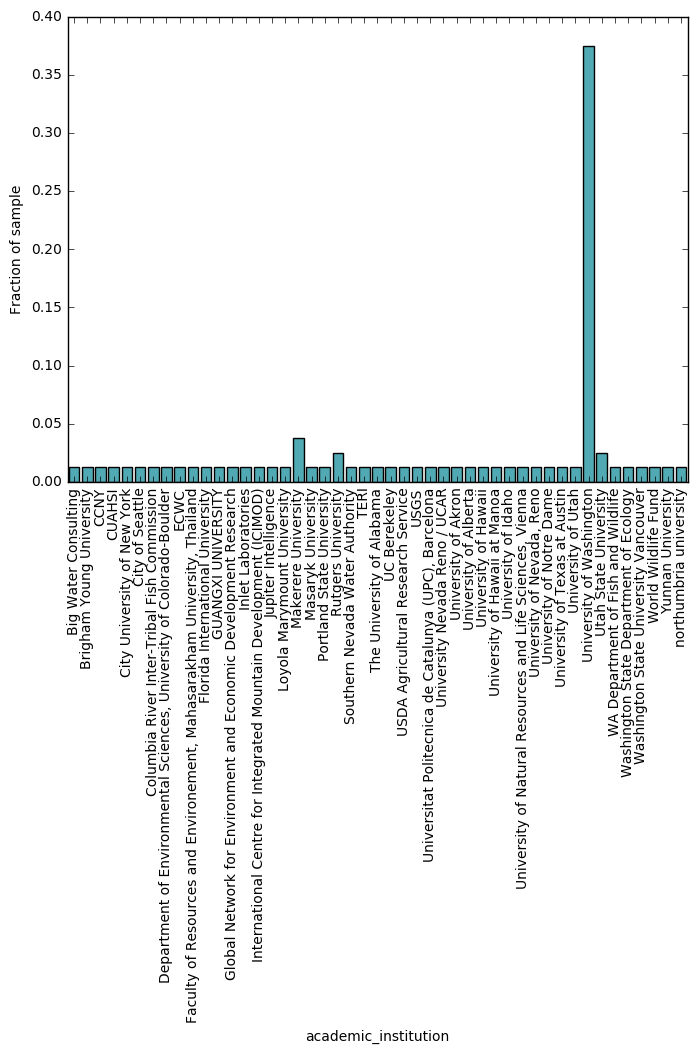

In [109]:
make_plot_categorical('academic_institution')

### What is your current geographical location?

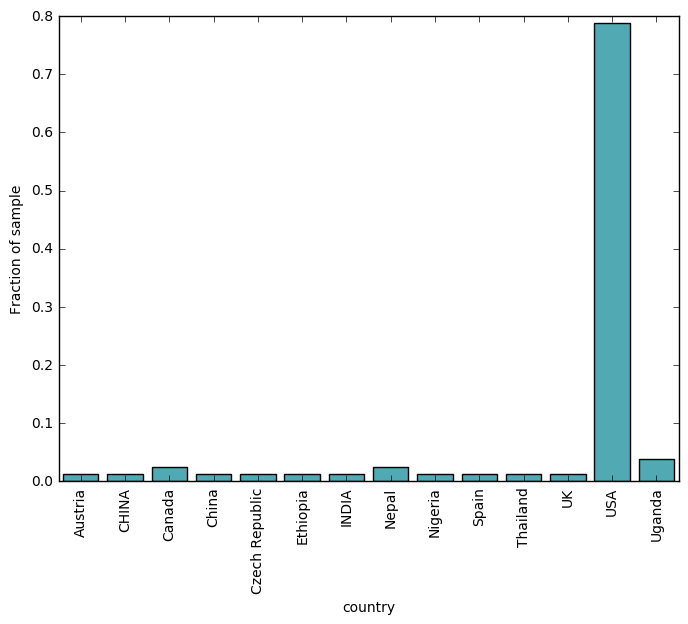

In [110]:
make_plot_categorical('country')

### What is your current position?

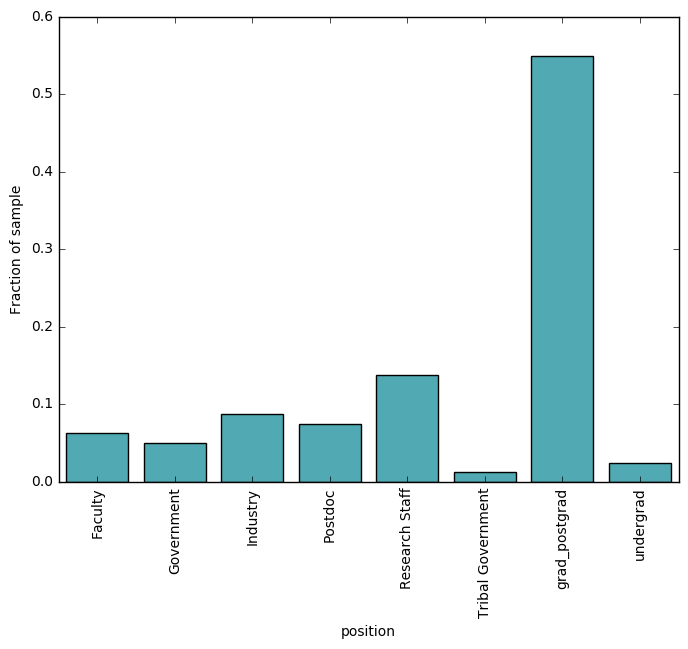

In [111]:
make_plot_categorical('position')

### In terms of racial or ethnic identity, do you consider yourself a minority with respect to the field of geospatial science?

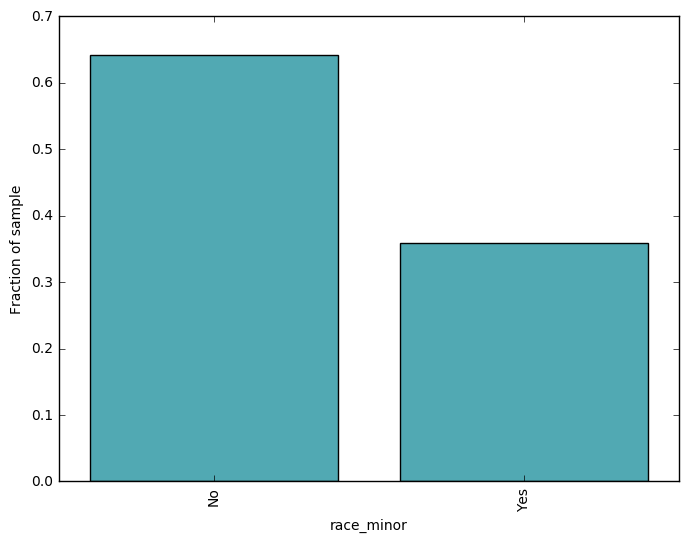

In [112]:
make_plot_categorical('race_minor')

### In terms of gender identity, do you consider yourself a minority with respect to the field of geospatial science?

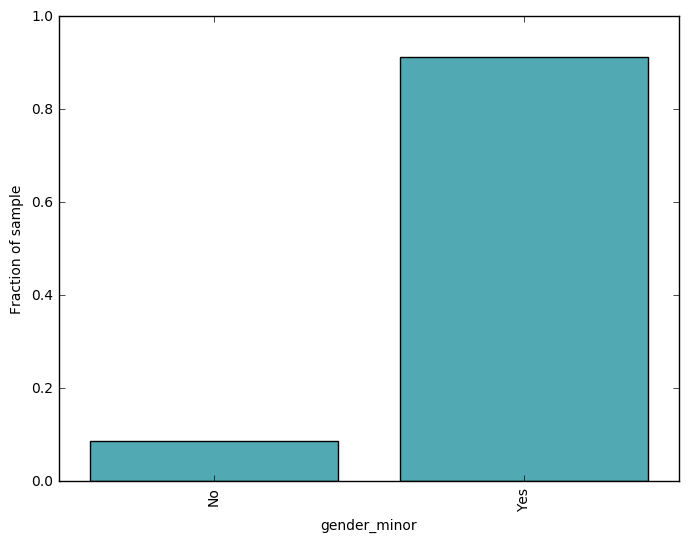

In [113]:
make_plot_categorical('gender_minor')

### Will you be likely to need financial support from us to attend Geo Hackweek?

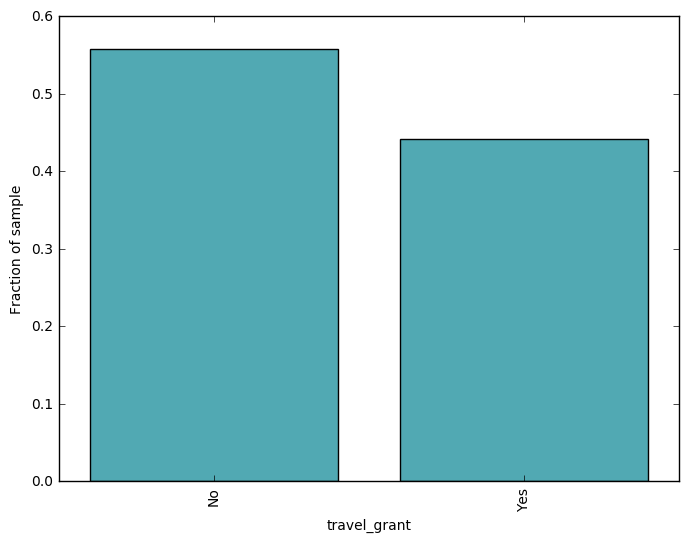

In [114]:
make_plot_categorical('travel_grant')

## Science domain data expertise

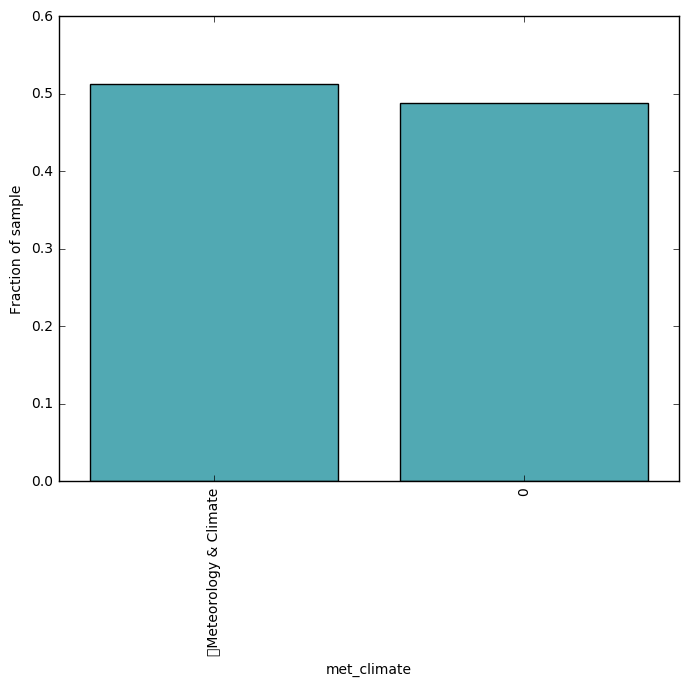

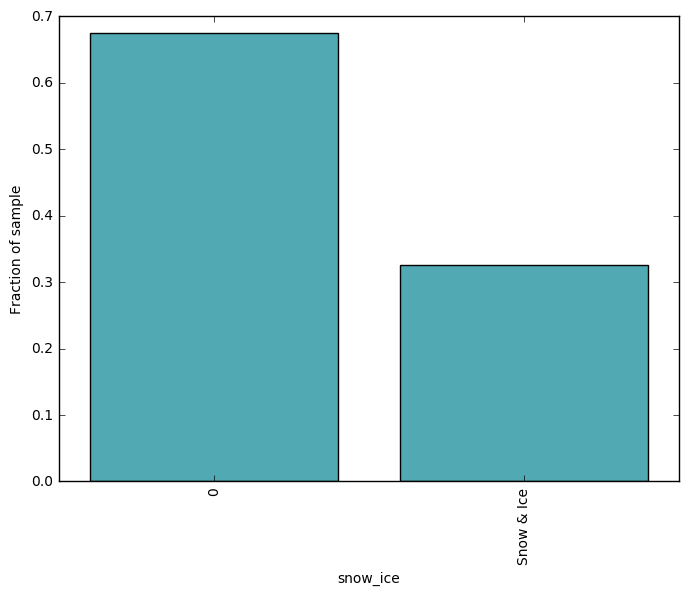

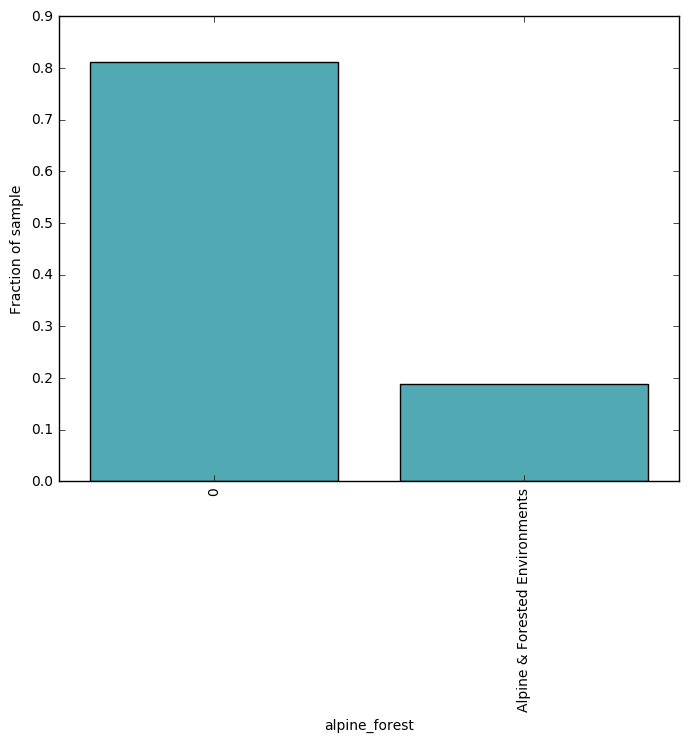

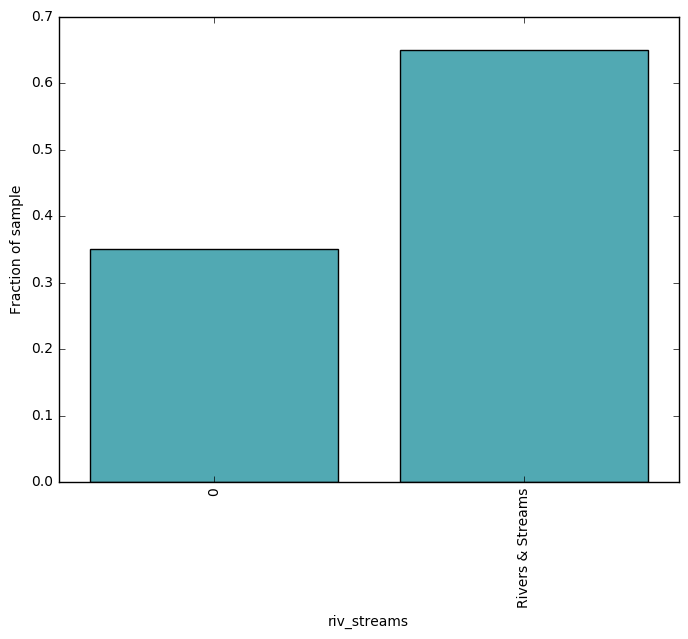

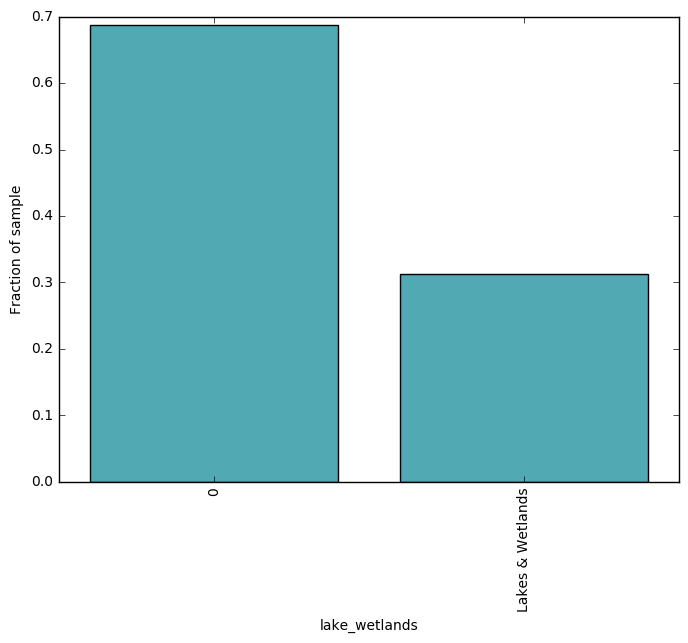

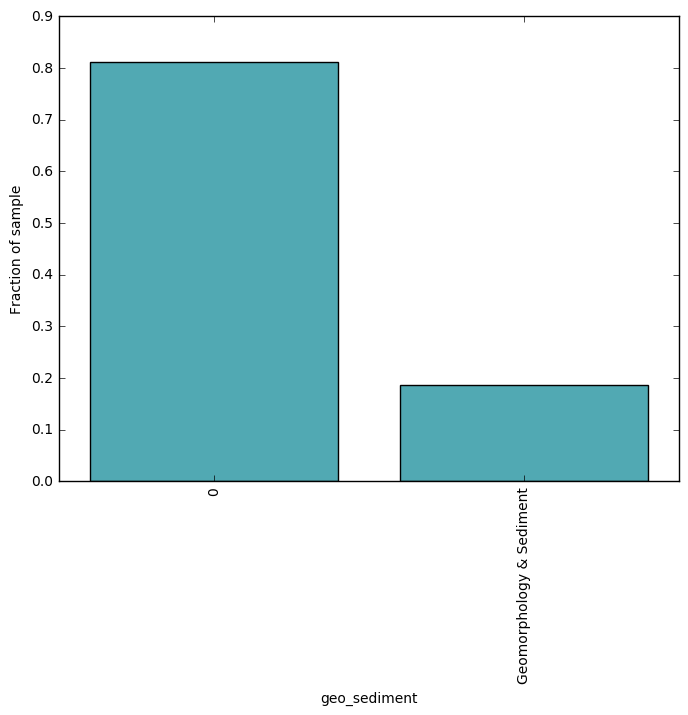

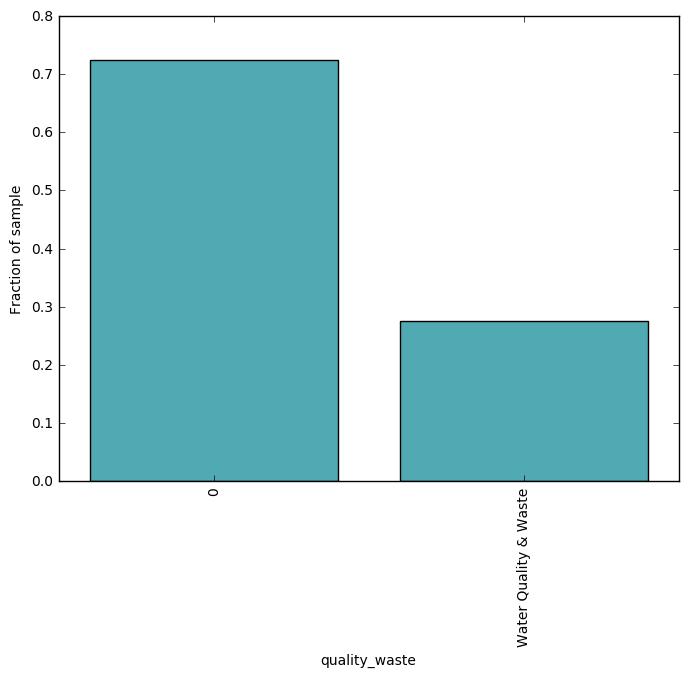

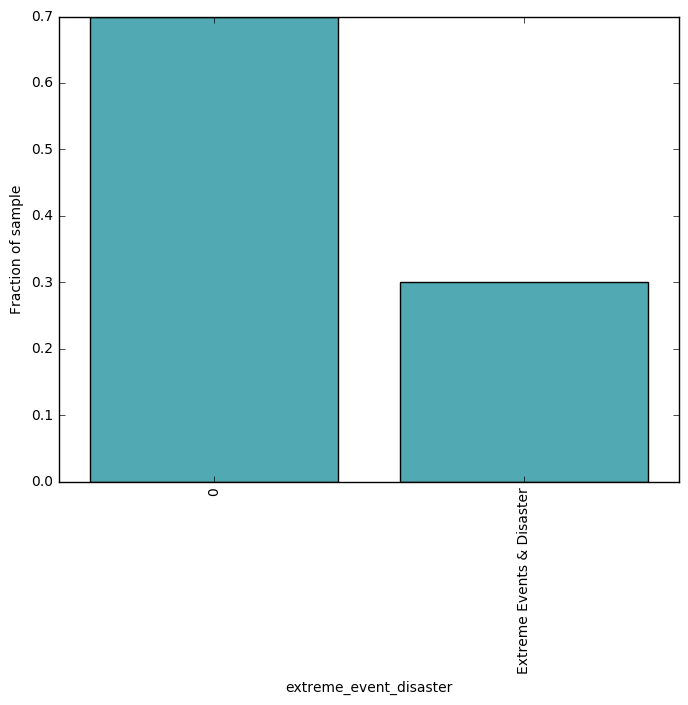

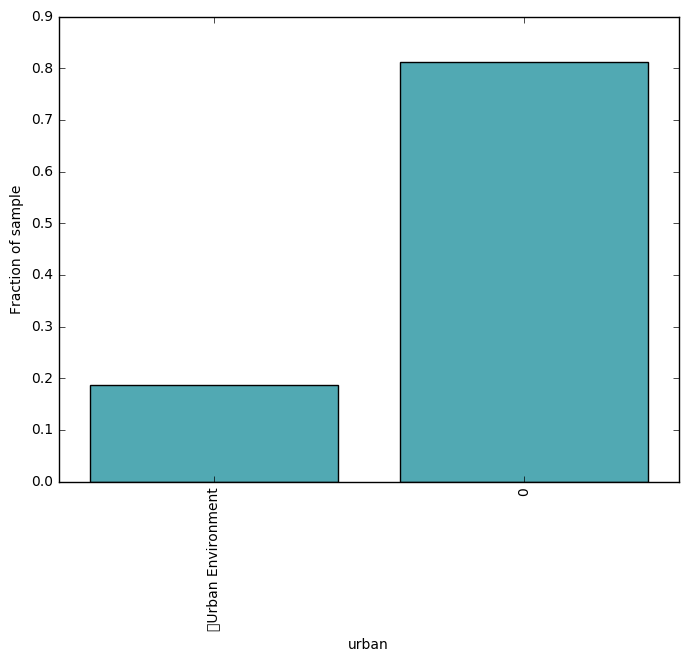

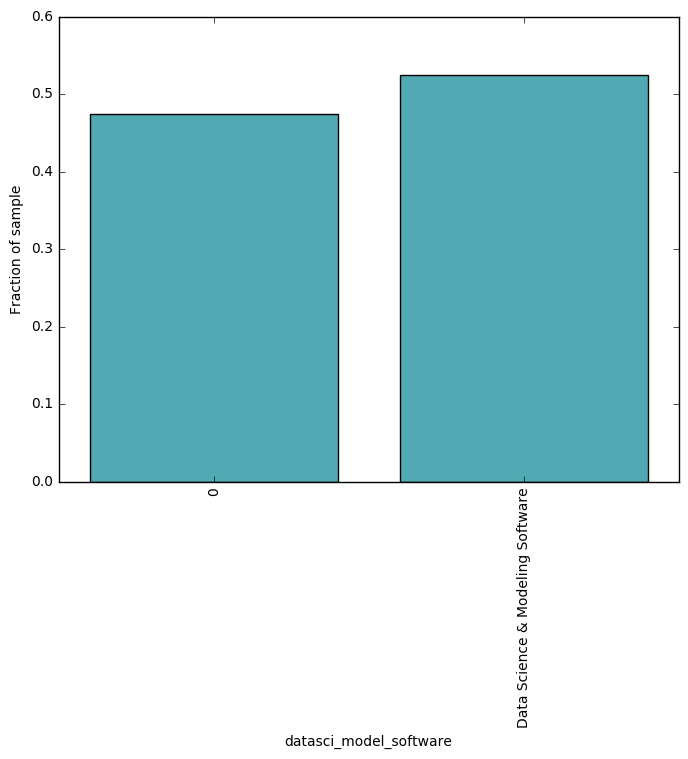

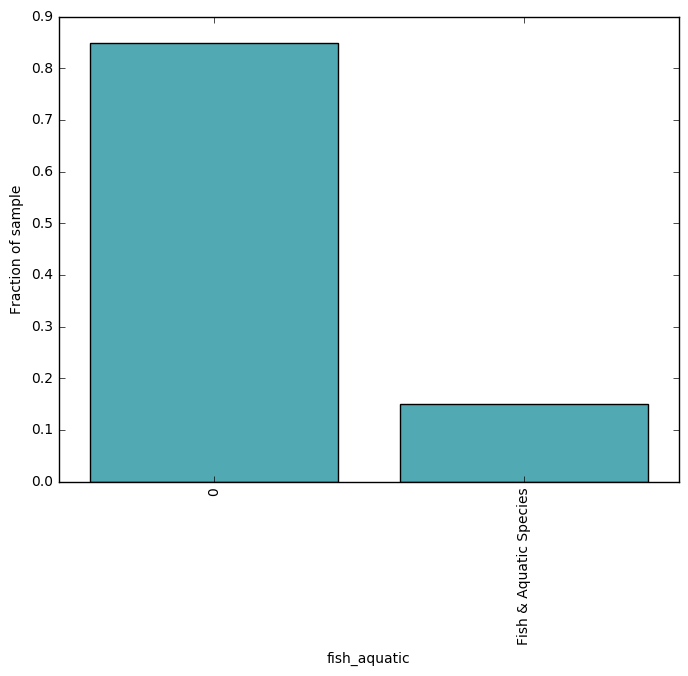

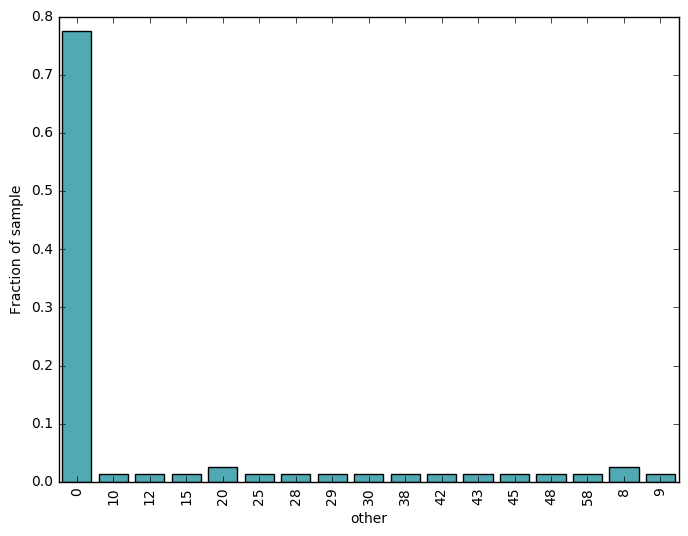

In [115]:
make_plot_categorical('met_climate')
make_plot_categorical('snow_ice')
make_plot_categorical('alpine_forest')
make_plot_categorical('riv_streams')

make_plot_categorical('lake_wetlands')
make_plot_categorical('geo_sediment')
make_plot_categorical('quality_waste')
make_plot_categorical('extreme_event_disaster')

make_plot_categorical('urban')
make_plot_categorical('datasci_model_software')
make_plot_categorical('fish_aquatic')
make_plot_categorical('other')

## Other Demographics

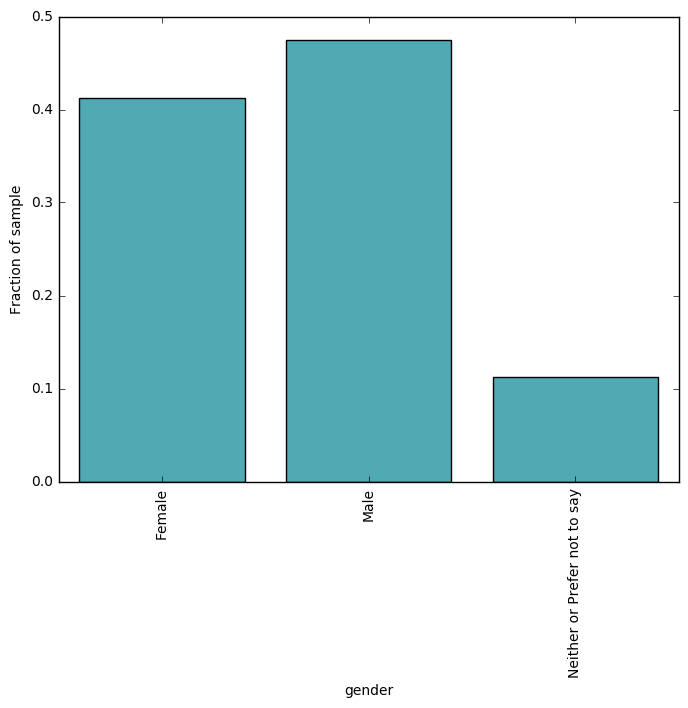

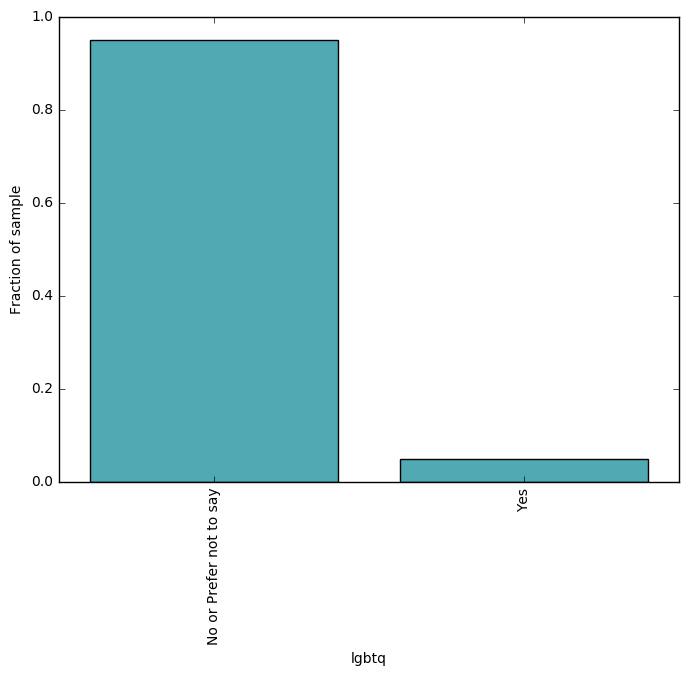

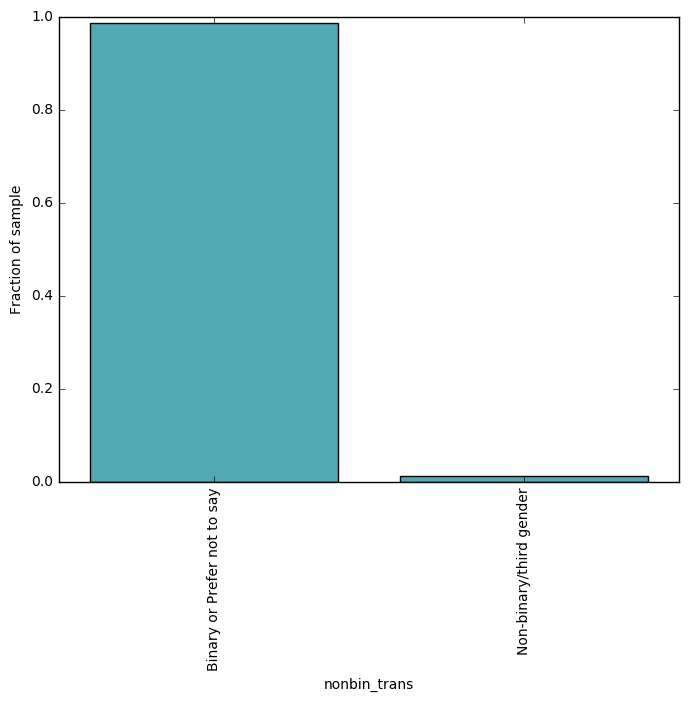

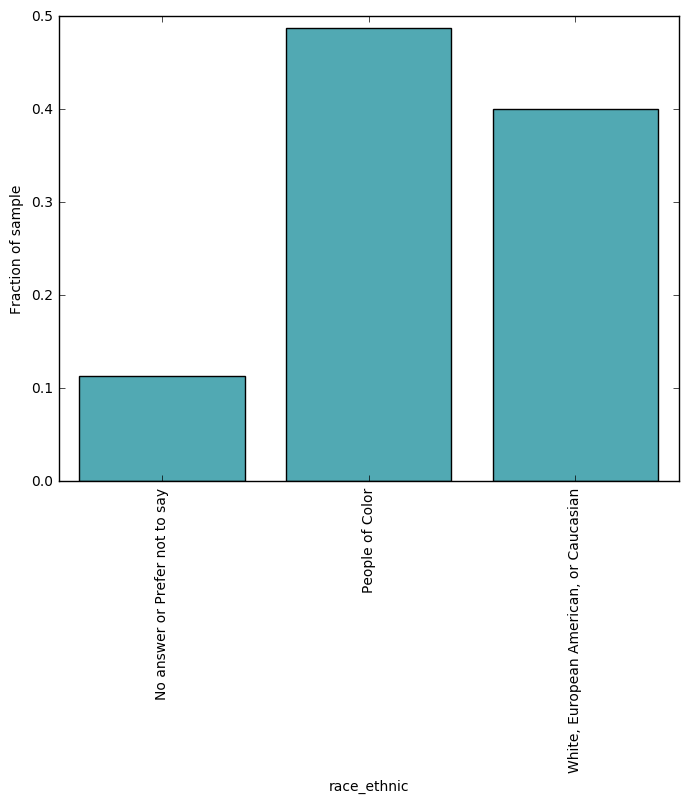

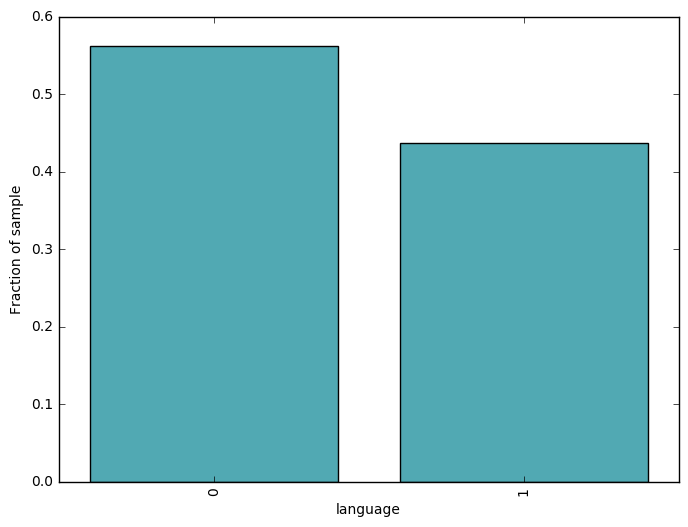

In [116]:
make_plot_categorical('gender')
make_plot_categorical('lgbtq')
make_plot_categorical('nonbin_trans')
make_plot_categorical('race_ethnic') # 1= English only
make_plot_categorical('language')

### Python coding skill

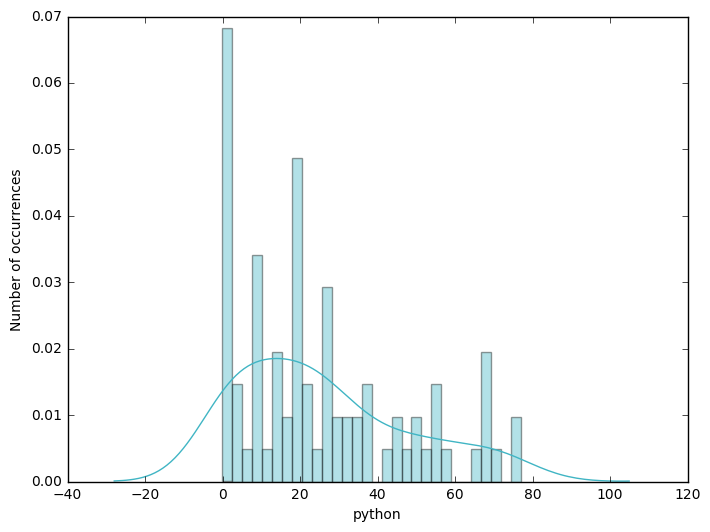

In [117]:
make_plot_continuous('python')

### at a US institution?

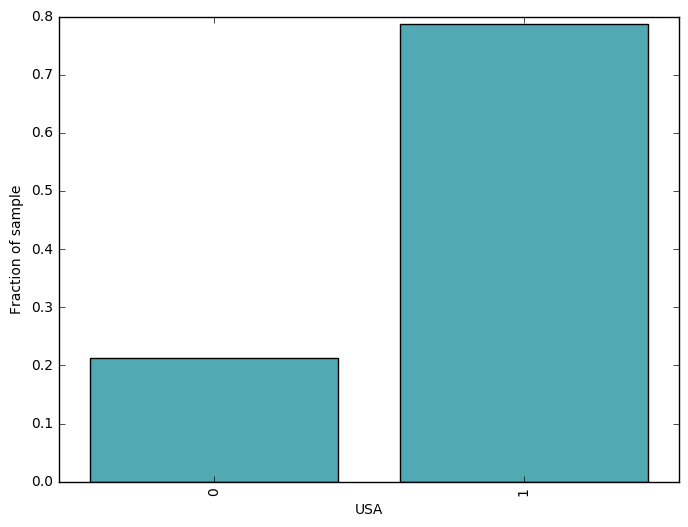

In [118]:
make_plot_categorical('USA')

## At UW?

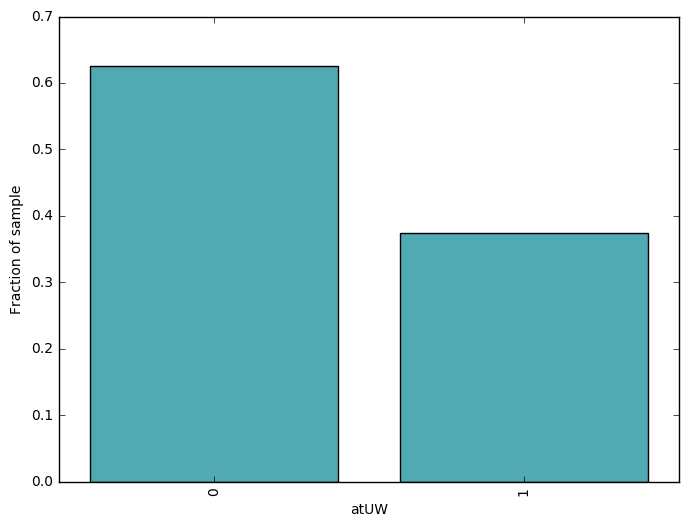

In [119]:
make_plot_categorical('atUW')

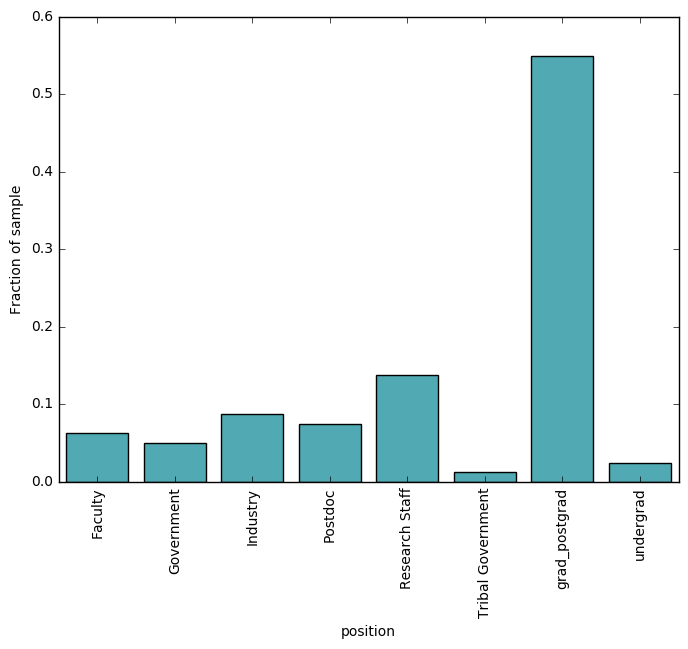

In [120]:
make_plot_categorical('position')

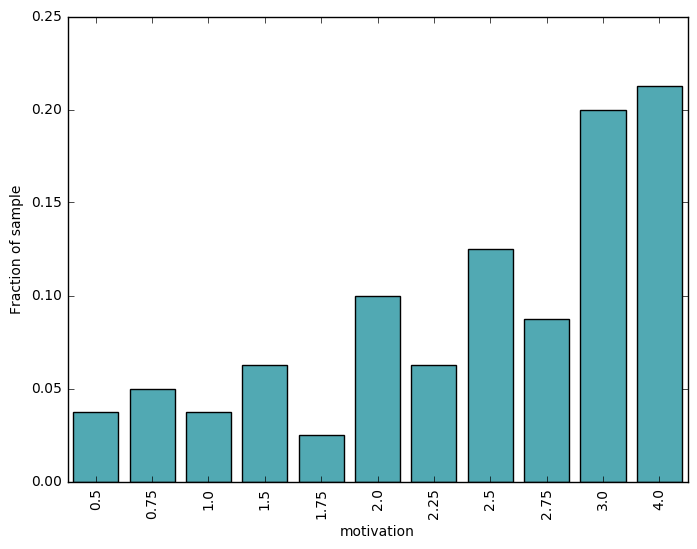

In [157]:
make_plot_categorical('motivation')# includes instructors

## 4.0  Running entrofy

### 4.1  define categories for consideration and weights

In [158]:
weights = {
           'python': 1.0,
           'USA': 1.0,
           'atUW': 1.0,
           'position': 1.0,
            'met_climate': 1.0,
            'snow_ice': 1.0,
            'alpine_forest': 1.0,
            'riv_streams': 1.0,
            'lake_wetlands': 1.0,
            'geo_sediment': 1.0,
            'quality_waste': 1.0,
            'extreme_event_disaster': 1.0,
            'urban': 1.0,
            'datasci_model_software': 1.0,
            'fish_aquatic': 1.0,
            'gender': 1.0,
            'lgbtq': 1.0,
            'nonbin_trans': 1.0,
            'race_ethnic': 1.0,
            'language': 1.0,
            'motivation': 10.0
          }

datatypes = {
             'python': 'continuous',
             'USA': 'categorical',
             'atUW': 'categorical',
             'position': 'categorical',
             'met_climate': 'categorical',
            'snow_ice': 'categorical',
            'alpine_forest': 'categorical',
            'riv_streams':'categorical',
            'lake_wetlands': 'categorical',
            'geo_sediment': 'categorical',
            'quality_waste':'categorical',
            'extreme_event_disaster':'categorical',
            'urban': 'categorical',
            'datasci_model_software': 'categorical',
            'fish_aquatic': 'categorical',
            'gender': 'categorical',
            'lgbtq': 'categorical',
            'nonbin_trans': 'categorical',
            'race_ethnic':'categorical',
            'language':'categorical',
            'motivation':'categorical'
             }


In [163]:
weights = {
           'python': 1.0,
           'USA': 1.0,
           'atUW': 1.0,
           'position': 1.0,
            'met_climate': 1.0,
            'snow_ice': 1.0,
            'alpine_forest': 1.0,
            'riv_streams': 1.0,
            'lake_wetlands': 1.0,
            'geo_sediment':1.0,
            'quality_waste':1.0,
            'extreme_event_disaster':1.0,
            'urban': 1.0,
            'datasci_model_software': 1.0,
            'fish_aquatic': 1.0,
            'gender': 1.0,
            'lgbtq': 1.0,
            'nonbin_trans': 1.0,
            'race_ethnic':1.0,
            'language': 1.0,
            'motivation':10.0
          }


In [164]:
mappers = entrofy.core.construct_mappers(df3, weights, datatypes)

In [165]:
mappers

{'USA': <entrofy.mappers.ObjectMapper at 0xd2329b0>,
 'alpine_forest': <entrofy.mappers.ObjectMapper at 0xd245160>,
 'atUW': <entrofy.mappers.ObjectMapper at 0xd4b2be0>,
 'datasci_model_software': <entrofy.mappers.ObjectMapper at 0xd245400>,
 'extreme_event_disaster': <entrofy.mappers.ObjectMapper at 0xd2452b0>,
 'fish_aquatic': <entrofy.mappers.ObjectMapper at 0xd245908>,
 'gender': <entrofy.mappers.ObjectMapper at 0xce6f400>,
 'geo_sediment': <entrofy.mappers.ObjectMapper at 0xd245630>,
 'lake_wetlands': <entrofy.mappers.ObjectMapper at 0xd245588>,
 'language': <entrofy.mappers.ObjectMapper at 0xc979a20>,
 'lgbtq': <entrofy.mappers.ObjectMapper at 0xd245ba8>,
 'met_climate': <entrofy.mappers.ObjectMapper at 0xd245358>,
 'motivation': <entrofy.mappers.ObjectMapper at 0xd245c88>,
 'nonbin_trans': <entrofy.mappers.ObjectMapper at 0xd232a90>,
 'position': <entrofy.mappers.ObjectMapper at 0xd245710>,
 'python': <entrofy.mappers.ContinuousMapper at 0xd232c88>,
 'quality_waste': <entrofy.ma

In [166]:
# label mappers to avoid confusion in merging dataframe columns later
mappers['USA'].prefix = 'USA'
mappers['atUW'].prefix = 'atUW'
mappers['position'].prefix = 'position'
mappers['datasci_model_software'].prefix = 'datasci_model_software'
mappers['extreme_event_disaster'].prefix = 'extreme_event_disaster'
mappers['fish_aquatic'].prefix = 'fish_aquatic'
mappers['geo_sediment'].prefix = 'geo_sediment'
mappers['lake_wetlands'].prefix = 'lake_wetlands'
mappers['met_climate'].prefix = 'met_climate'
mappers['quality_waste'].prefix = 'quality_waste'
mappers['riv_streams'].prefix = 'riv_streams'
mappers['snow_ice'].prefix = 'snow_ice'
mappers['urban'].prefix = 'urban'

mappers['gender'].prefix = 'gender'
mappers['lgbtq'].prefix = 'lgbtq'
mappers['nonbin_trans'].prefix = 'nonbin_trans'
mappers['race_ethnic'].prefix = 'race_ethnic'
mappers['language'].prefix = 'language'
mappers['motivation'].prefix = 'motivation'

### 4.2  Select participants from instructor list and those pre-selected based on motivation rubric


### We performed an initial screening asking: "will this applicant make a positive contribution to geohackweek?" No responses are removed here.

In [126]:
opt_outs = []

### We preselect 30% of applicants who are invited by the adminstrative team or highly motivated. This list includes instructors and coordinators.


In [167]:
instructors=[3,12,15,18,22,23,24,27,29,30,31,32,33,51,65,79,80]
pre_select_applicants=[1,2,6,7,8,13,16,21,26,34,36,37,38,39,40,41,42,44,45,46,48,50,52,53,54,58,60,61,64,67,70]
pre_selects=instructors+pre_select_applicants
for i in range(len(pre_selects)):
  pre_selects[i] -= 1
pre_selects.sort()

### 4.3 Set Diversity targets for multiple participant population objectives

### 4.3.1 Diversity targets for geography, institution, career stage 

In [168]:
# non-US versus US countries    
#set to global population numbers (as with other diversity targets)
# Objective: train a cohort that represents the global population in order to advance research and technology for global water problems
new_targets = [0.95, 0.05]
sorted_keys = np.sort(list(mappers['USA'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['USA'].targets[key] = t
    
# non-UW versus UW institutions   
#  Objective: include UW & UW Freshwater Initiative participants (target =50%) and expand network of UW participants beyond UW (50%)
new_targets = [0.50, 0.50]
sorted_keys = np.sort(list(mappers['atUW'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['atUW'].targets[key] = t

# career position (Faculty/Government/Industry/grad_postgrad/other/undergrad)  
#Objective: 50% graduate student/postdoc, uniform distribution of all other career stages
num_not_grad_categories=7
not_grad_target=0.5
p=not_grad_target/num_not_grad_categories #uniform distribution for categories that are not grad students
new_targets = [p, p, p ,p,p,p,0.5,p]
sorted_keys = np.sort(list(mappers['position'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['position'].targets[key] = t    


### 4.3.2 Diversity targets for demographics

In [169]:
  
#set to global population numbers (as with other diversity targets)
# Objective: train a cohort that represents the global population in order to advance research and technology for global water problems
new_targets = [0.45, 0.45,0.1]
sorted_keys = np.sort(list(mappers['gender'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['gender'].targets[key] = t

#set to global population numbers (as with other diversity targets)
# Objective: train a cohort that represents the global population in order to advance research and technology for global water problems
    
new_targets = [0.97, 0.03]
sorted_keys = np.sort(list(mappers['nonbin_trans'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['nonbin_trans'].targets[key] = t
    
# non-UW versus UW institutions   
#  Objective: include UW & UW Freshwater Initiative participants (target =50%) and expand network of UW participants beyond UW (50%)
new_targets = [0.87, 0.13]
sorted_keys = np.sort(list(mappers['lgbtq'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['lgbtq'].targets[key] = t
    
# non-UW versus UW institutions   
#  Objective: include UW & UW Freshwater Initiative participants (target =50%) and expand network of UW participants beyond UW (50%)
new_targets = [0.1, 0.8,0.1]
sorted_keys = np.sort(list(mappers['race_ethnic'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['race_ethnic'].targets[key] = t
    
# non-UW versus UW institutions   
#  Objective: include UW & UW Freshwater Initiative participants (target =50%) and expand network of UW participants beyond UW (50%)
new_targets = [0.95, 0.05]
sorted_keys = np.sort(list(mappers['language'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['language'].targets[key] = t



In [170]:
df['motivation'].unique()

array([ 2.75,  4.  ,  1.  ,  2.  ,  3.  ,  2.5 ,  2.25,  0.5 ,  0.75,
        1.5 ,  1.75])

#### Weights for motivation and leadership are based on an exponentially decreasing distribution.  Applicants with higher scores from the CV and essay have an increased likelihood of being selected. 

In [172]:
new_targets = [0.020227785,
0.025972991,
0.03334998,
0.054984822,
0.070601908,
0.090654645,
0.116402868,
0.149464241,
0.191915885,
0.246424874,
0]

sorted_keys = np.sort(list(mappers['motivation'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['motivation'].targets[key] = t

In [173]:
idx, max_score = entrofy.core.entrofy(df3, 60,
                                      mappers=mappers,
                                      weights=weights,
                                      seed=seed,
                                      opt_outs = opt_outs,
                                      pre_selects = pre_selects)
print(max_score)

390.816573135


### 4.3.3 Diversity targets for science expertise 

In [174]:
new_targets = [0.50, 0.50]

sorted_keys = np.sort(list(mappers['datasci_model_software'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['datasci_model_software'].targets[key] = t

sorted_keys = np.sort(list(mappers['extreme_event_disaster'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['extreme_event_disaster'].targets[key] = t
    
sorted_keys = np.sort(list(mappers['fish_aquatic'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['fish_aquatic'].targets[key] = t

sorted_keys = np.sort(list(mappers['geo_sediment'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['geo_sediment'].targets[key] = t
    
sorted_keys = np.sort(list(mappers['lake_wetlands'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['lake_wetlands'].targets[key] = t

sorted_keys = np.sort(list(mappers['met_climate'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['met_climate'].targets[key] = t
    
sorted_keys = np.sort(list(mappers['quality_waste'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['quality_waste'].targets[key] = t
    
sorted_keys = np.sort(list(mappers['riv_streams'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['riv_streams'].targets[key] = t
    
sorted_keys = np.sort(list(mappers['snow_ice'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['snow_ice'].targets[key] = t
    
sorted_keys = np.sort(list(mappers['urban'].targets.keys()))
for t, key in zip(new_targets, sorted_keys):
    mappers['urban'].targets[key] = t

### Python skill level is the only continuous field. Here we use the default distribution, targeting 1/3 in equally-distributed numeric bins

In [177]:
mappers['python'].targets

{'0.000000_25.666667': 0.3333333333333333,
 '25.666667_51.333333': 0.3333333333333333,
 '51.333333_77.000000': 0.3333333333333333}

In [178]:
mappers['python'].boundaries = [1., 20., 55., 77.]

In [179]:
Python_boundaries = [0.0, 20.0, 30.0, 40.0, 80.0]
Python_targets = {"0-20":0.25, "20-30":0.25, "30-40":0.25, "40-80":0.25}
Python_column_names = ["0-20", "20-30", "30-40", "40-80"]
mappers['python'] = entrofy.mappers.ContinuousMapper(df3["python"], n_out=4,
                                             boundaries=Python_boundaries,
                                             targets=Python_targets, column_names = Python_column_names)

In [180]:
mappers

{'USA': <entrofy.mappers.ObjectMapper at 0xd2329b0>,
 'alpine_forest': <entrofy.mappers.ObjectMapper at 0xd245160>,
 'atUW': <entrofy.mappers.ObjectMapper at 0xd4b2be0>,
 'datasci_model_software': <entrofy.mappers.ObjectMapper at 0xd245400>,
 'extreme_event_disaster': <entrofy.mappers.ObjectMapper at 0xd2452b0>,
 'fish_aquatic': <entrofy.mappers.ObjectMapper at 0xd245908>,
 'gender': <entrofy.mappers.ObjectMapper at 0xce6f400>,
 'geo_sediment': <entrofy.mappers.ObjectMapper at 0xd245630>,
 'lake_wetlands': <entrofy.mappers.ObjectMapper at 0xd245588>,
 'language': <entrofy.mappers.ObjectMapper at 0xc979a20>,
 'lgbtq': <entrofy.mappers.ObjectMapper at 0xd245ba8>,
 'met_climate': <entrofy.mappers.ObjectMapper at 0xd245358>,
 'motivation': <entrofy.mappers.ObjectMapper at 0xd245c88>,
 'nonbin_trans': <entrofy.mappers.ObjectMapper at 0xd232a90>,
 'position': <entrofy.mappers.ObjectMapper at 0xd245710>,
 'python': <entrofy.mappers.ContinuousMapper at 0xd247b00>,
 'quality_waste': <entrofy.ma

In [181]:
idx, max_score = entrofy.core.entrofy(df3, 60,
                                      mappers=mappers,
                                      weights=weights,
                                      seed=seed,
                                      opt_outs = opt_outs,
                                      pre_selects = pre_selects)
print(max_score)

393.150846995


In [182]:
df_out = df3.loc[idx]

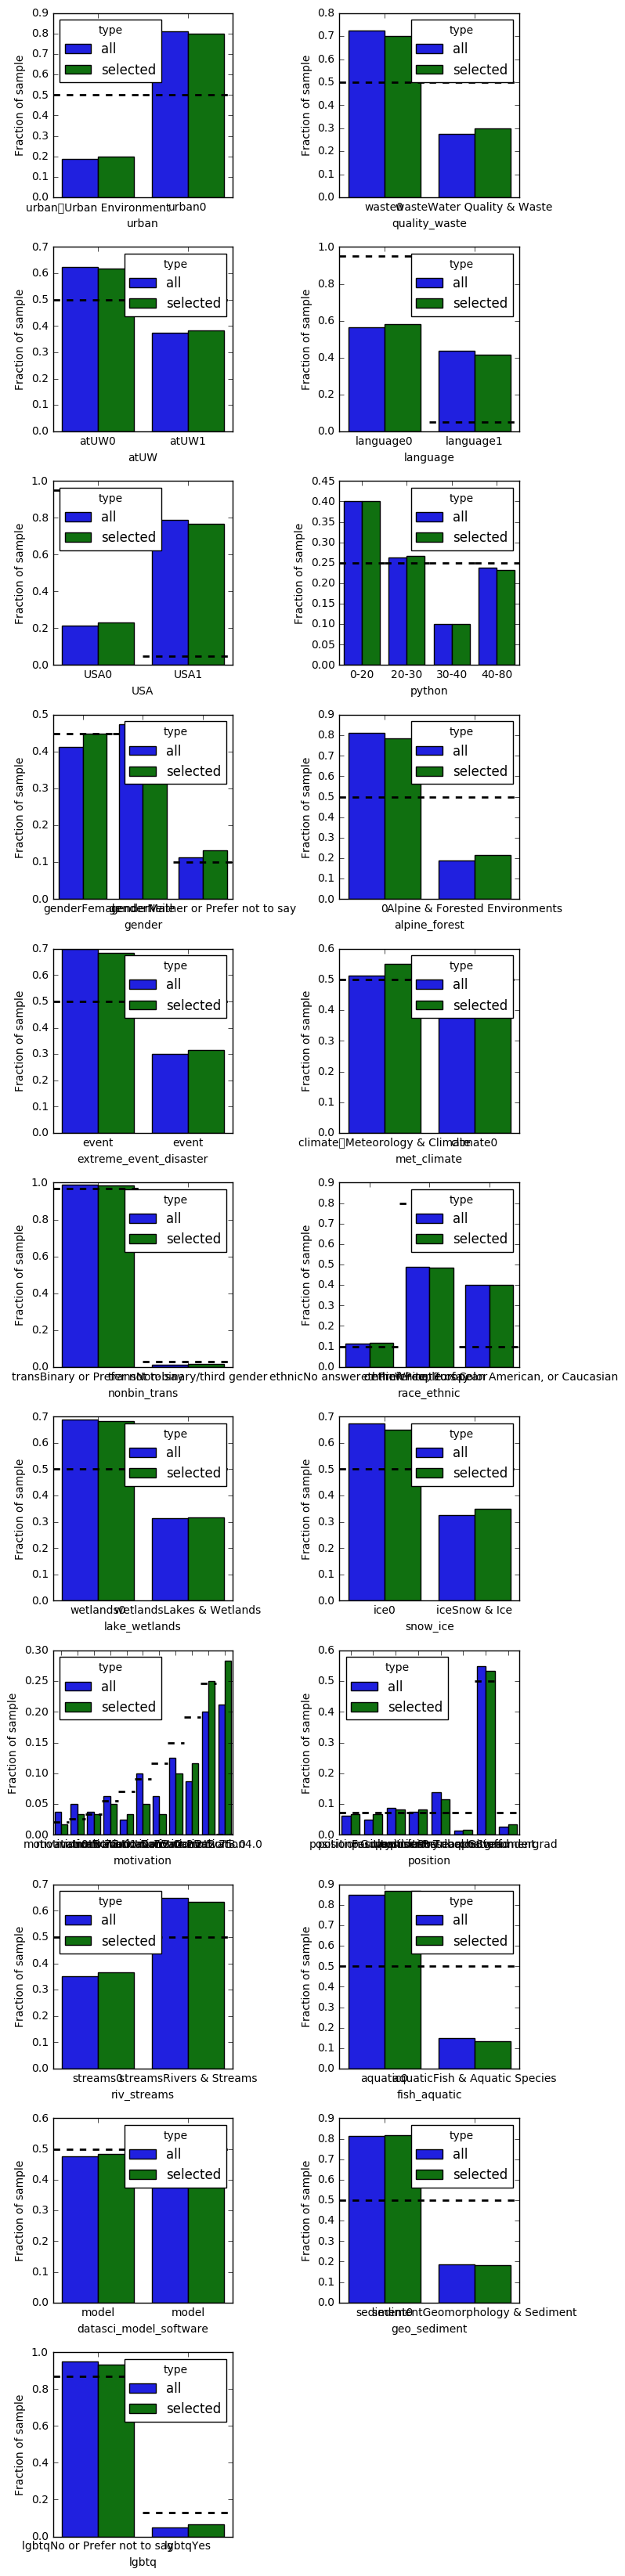

In [183]:
_ = entrofy.plotting.plot(df3, idx, weights, mappers=mappers, cols=2)

### plotting career position so it is easier to see

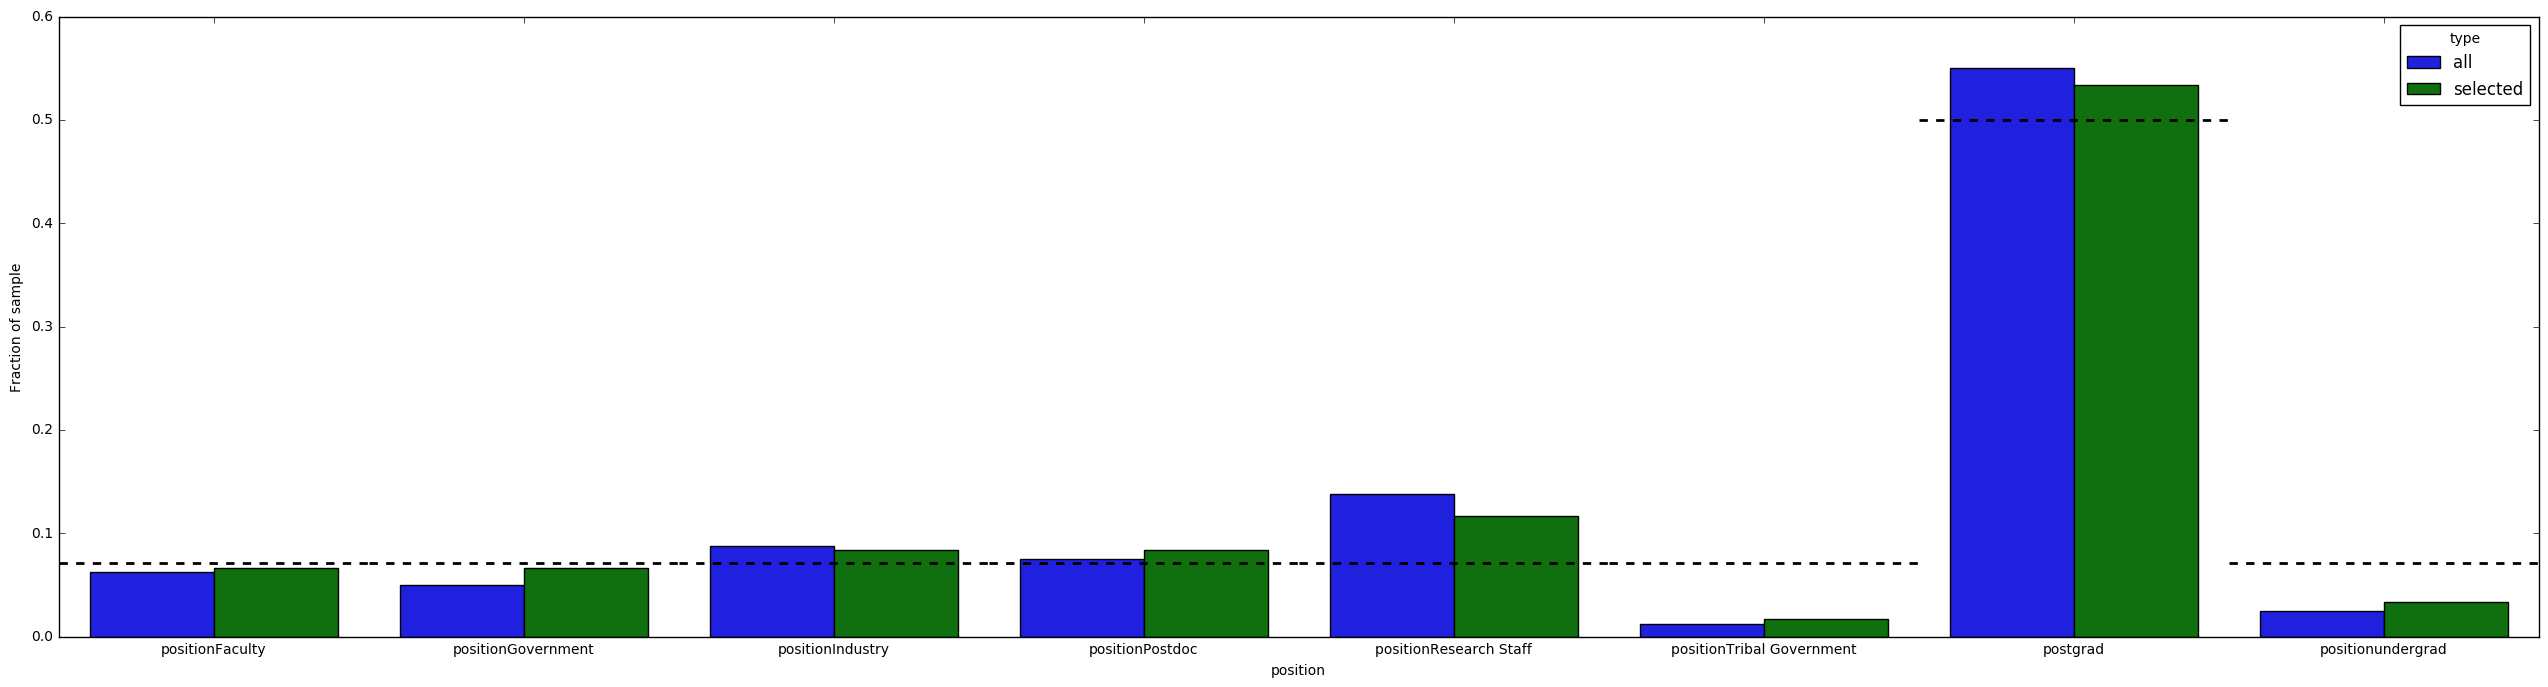

In [184]:
_, _ = entrofy.plotting.plot_fractions(df3["position"], idx,
                                       "position", mappers["position"])

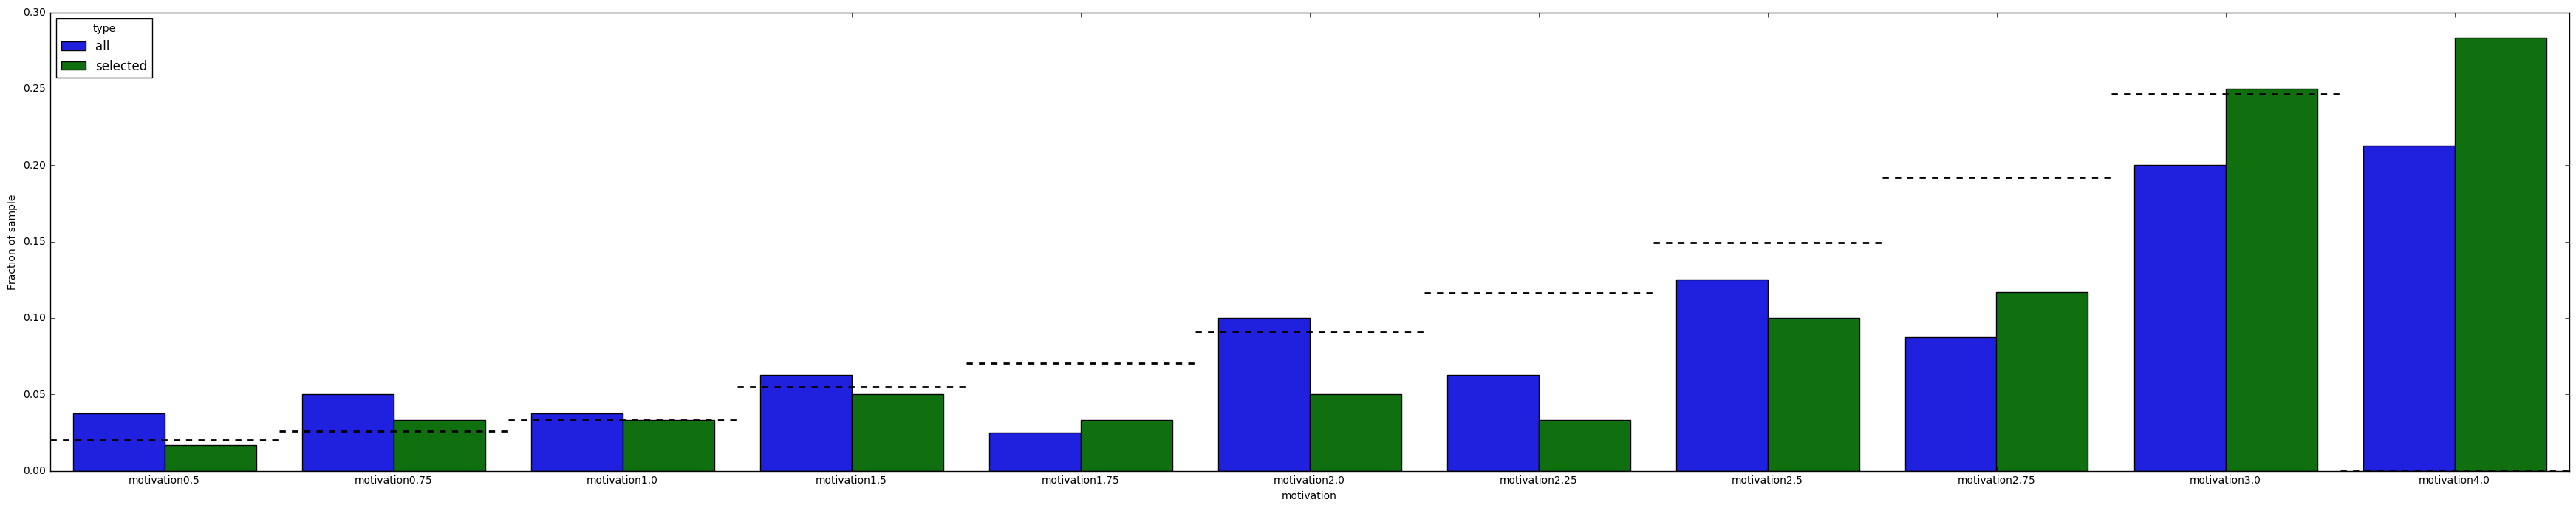

In [187]:
_, _ = entrofy.plotting.plot_fractions(df3["motivation"], idx,
                                       "motivation", mappers["motivation"])

In [185]:
df3.loc[set(idx), 'accepted'] = 'YES'
df3.loc[set(df3.index) - set(idx), 'accepted'] = 'NO'

In [186]:
df3[['first_name','last_name','email','country','academic_institution','position',
        'travel_grant','accepted','UniqueID','PreselectIDcheck']].to_csv('final.csv')

In [142]:
df3['atUW'] = df3.apply(lambda row: 'University of Washington' if row['academic_institution'] == 'University of Washington' else 'Not UW', axis=1)
df3['inUSA'] = df3.apply(lambda row: 'USA' if row['country'] == 'USA' else 'Not USA', axis=1)


In [143]:
df3['inUSA'].unique()

array(['USA', 'Not USA'], dtype=object)

In [144]:
df3[['country','academic_institution','position']].to_csv('applicant_geo_2019.csv')


In [191]:
df3[['motivation','accepted']].to_csv('applicant_mot_2019.csv')

In [190]:
df3[['gender','language','race_ethnic','accepted']].to_csv('applicant_bias_2019.csv')

In [145]:
df3[['alpine_forest','datasci_model_software','extreme_event_disaster',
    'fish_aquatic','geo_sediment','lake_wetlands','met_climate',
    'quality_waste','riv_streams','snow_ice','urban','country']].to_csv('applicant_science_2019.csv')

In [146]:
df3[['python','language','gender',
    'position','race_ethnic','lgbtq','nonbin_trans']].to_csv('applicant_demo_2019.csv')

In [147]:
mappers

{'USA': <entrofy.mappers.ObjectMapper at 0xcc547f0>,
 'alpine_forest': <entrofy.mappers.ObjectMapper at 0xc764d30>,
 'atUW': <entrofy.mappers.ObjectMapper at 0xef4e588>,
 'datasci_model_software': <entrofy.mappers.ObjectMapper at 0xef68c88>,
 'extreme_event_disaster': <entrofy.mappers.ObjectMapper at 0xc764eb8>,
 'fish_aquatic': <entrofy.mappers.ObjectMapper at 0xeeca438>,
 'gender': <entrofy.mappers.ObjectMapper at 0xc78de48>,
 'geo_sediment': <entrofy.mappers.ObjectMapper at 0xeecadd8>,
 'lake_wetlands': <entrofy.mappers.ObjectMapper at 0xef68c18>,
 'language': <entrofy.mappers.ObjectMapper at 0xf8df0b8>,
 'lgbtq': <entrofy.mappers.ObjectMapper at 0xf3b4160>,
 'met_climate': <entrofy.mappers.ObjectMapper at 0xef68048>,
 'nonbin_trans': <entrofy.mappers.ObjectMapper at 0xf8df160>,
 'position': <entrofy.mappers.ObjectMapper at 0xeeca390>,
 'python': <entrofy.mappers.ContinuousMapper at 0x11dea4a8>,
 'quality_waste': <entrofy.mappers.ObjectMapper at 0xf3b4630>,
 'race_ethnic': <entrofy.